SEEK JOB POSTINGS IN SYDNEY RECENTLY 

In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [45]:
url= 'https://www.seek.com.au/jobs/in-Sydney-NSW-2000?page=25&sortmode=ListedDate' 
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [46]:


# Function to extract job details from a single page
def extract_job_details(page_number):
    url = f'https://www.seek.com.au/jobs/in-Sydney-NSW-2000?page={page_number}&sortmode=ListedDate'
    
    # Send GET request to the page
    response = requests.get(url)
    
    # If the page is fetched successfully (status code 200), parse the HTML content
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all job listing articles (each with the 'aria-label' attribute)
        job_listings = soup.find_all('article', {'aria-label': True})
        
        job_data = []
        
        # Loop through each job listing and extract the relevant information
        for article in job_listings:
            try:
                # Extract the job title (from aria-label)
                job_title = article.get('aria-label')

                # Extract the company name
                company_name = article.find('a', {'data-automation': 'jobCompany'}).get_text(strip=True)

                # Extract the job type (Full time, etc.)
                job_type = article.find('p', text=lambda text: text and "job" in text).get_text(strip=True).replace('This is a ', '')

                # Extract the job location
                job_location = article.find('a', {'data-automation': 'jobLocation'}).get_text(strip=True)

                # Extract the job highlights (located in <li> elements)
                job_highlights = [highlight.get_text(strip=True) for highlight in article.find_all('li')]

                # Extract the job short description
                job_description = article.find('span', {'data-automation': 'jobShortDescription'}).get_text(strip=True)
                salary = article.find('span', {'data-automation':'jobSalary'}).get_text(strip=True)
                classification = article.find('span', string=lambda text: text and text.startswith('subClassification:')).text.replace('subClassification: ', '').replace('&amp;', '&')

                # Append the job details to the list
                job_data.append({
                    'Job Title': job_title,
                    'Company Name': company_name,
                    'Classification': classification,
                    'Job Type': job_type,
                    'Location': job_location,
                    'Job Highlights': job_highlights,
                    'Job Description': job_description,
                    'Salary': salary
                })
            except Exception as e:
                print(f"Error extracting data for a job: {e}")
        
        return job_data
    else:
        print(f"Failed to fetch page {page_number}. Status code: {response.status_code}")
        return []

# Initialize an empty list to store all the job data
all_jobs = []

# Loop through pages and collect job details
for page in range(1, 30):  
    print(f"Scraping page {page}...")
    job_details = extract_job_details(page)
    all_jobs.extend(job_details)

# Create a pandas DataFrame from the collected job data
df = pd.DataFrame(all_jobs)

# Display the first few rows of the DataFrame
print("\nDataFrame created with job listings:")
print(df.head())


Scraping page 1...


/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_78568/4022196613.py:27: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.



Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Scraping page 2...
Error extracting data for a job: 'NoneType' object has no attribute 'get_text'
Error extracting data for a job: 

In [47]:
df.head()

,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary
0,"Senior Analyst, Account-Based Marketing (ABM)",Chandler Macleod,Brand Management,Contract/Temp job,Sydney NSW,"[Contract: 12 Months, Starts Dec 2024, Sydney ...",Are you a passionate marketing professional wi...,Competitive
1,Childcare Assistant Coordinator,Expect A Star,Childcare & Outside School Hours Care,Full time job,Mosman,"[Not required to work split shifts, Annual Bon...","Work for this non-profit OOSH, Located in the ...","Up to $70,000 pa"
2,Technical Project Coordinator - Colocation,FinXL IT Professional Services,Programme & Project Management,Contract/Temp job,Sydney NSW,[],An opportunity exists for a Technical Project ...,-
3,Digital Communications Officer,Ministry of Health,Marketing Communications,Full time job,St Leonards,[],Join our team at Ministry of Health for an exc...,"$106,025 - $117,363 plus Super and AL loading"
4,Manufacturing Labourers - Day Shift,Omni Recruit,Assembly & Process Work,Casual/Vacation job,Revesby,[],Looking for a new opportunity in manufacturing...,$32.50


In [48]:
import matplotlib.pyplot as plt

In [49]:
df.head()

,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary
0,"Senior Analyst, Account-Based Marketing (ABM)",Chandler Macleod,Brand Management,Contract/Temp job,Sydney NSW,"[Contract: 12 Months, Starts Dec 2024, Sydney ...",Are you a passionate marketing professional wi...,Competitive
1,Childcare Assistant Coordinator,Expect A Star,Childcare & Outside School Hours Care,Full time job,Mosman,"[Not required to work split shifts, Annual Bon...","Work for this non-profit OOSH, Located in the ...","Up to $70,000 pa"
2,Technical Project Coordinator - Colocation,FinXL IT Professional Services,Programme & Project Management,Contract/Temp job,Sydney NSW,[],An opportunity exists for a Technical Project ...,-
3,Digital Communications Officer,Ministry of Health,Marketing Communications,Full time job,St Leonards,[],Join our team at Ministry of Health for an exc...,"$106,025 - $117,363 plus Super and AL loading"
4,Manufacturing Labourers - Day Shift,Omni Recruit,Assembly & Process Work,Casual/Vacation job,Revesby,[],Looking for a new opportunity in manufacturing...,$32.50


In [50]:
import seaborn as sns
com = df.groupby('Company Name').size().reset_index(name='Company Count')

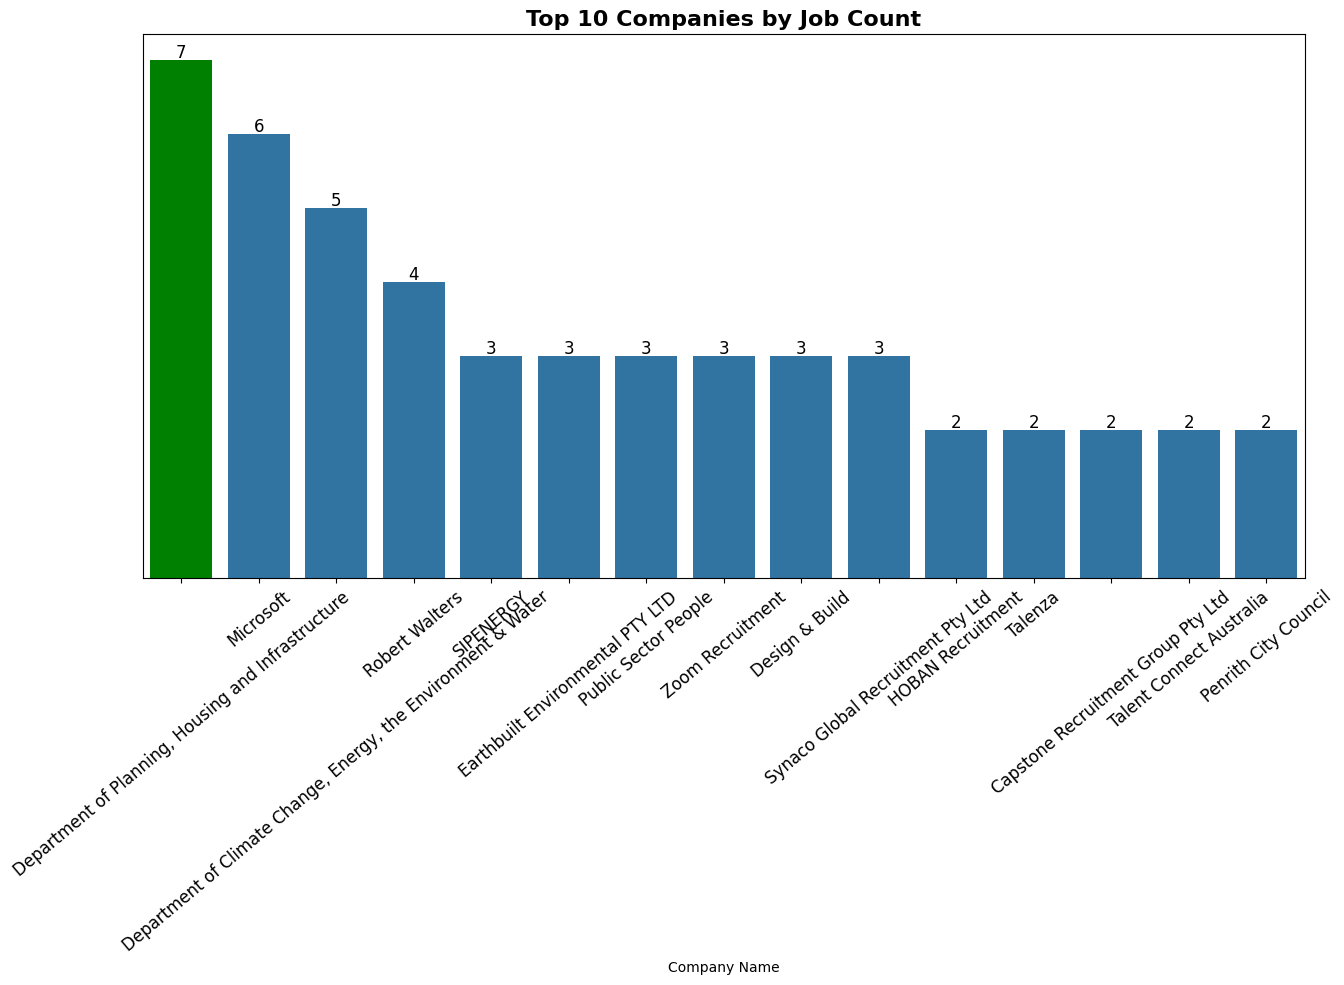

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

com = df.groupby('Company Name').size().reset_index(name='Company Count')
com = com.sort_values(by='Company Count', ascending=False).head(15)


# Create the plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Company Name', y='Company Count', data=com)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Display the height of the bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning the label
                ha='center', va='center',  # Aligning the label
                fontsize=12, color='black',  # Font size and color
                xytext=(0, 5), textcoords='offset points')  # Adjust the position a bit above the bar

# Highlight the highest bar by finding the bar with the max height
max_height = max(p.get_height() for p in ax.patches)
for p in ax.patches:
    if p.get_height() == max_height:
        p.set_facecolor('green')  # Set color of highest bar to red

# Set title and labels
plt.title("Top 10 Companies by Job Count", fontsize=16, weight='bold')
plt.xticks(rotation=40, ha='center', fontsize=12)  # Rotate x-axis labels and set font size

# Remove y-axis
ax.get_yaxis().set_visible(False)

# Adjust layout to prevent clipping
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()


In [52]:
df[df['Company Name'].str.startswith('Lifestart', na=False)]

,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary


During Octber 2024, the job market has high demand for the industry of healthcare. Some common hiring postions are Social Worker, Pathologist, Early Childhood Coordinator, Therapist, Psychologist.

In [53]:
df[df['Company Name'].str.startswith('Roc', na=False)]

,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary


In [54]:
df[df['Job Title'].str.contains('analyst', case=False, na=False)]


,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary
0,"Senior Analyst, Account-Based Marketing (ABM)",Chandler Macleod,Brand Management,Contract/Temp job,Sydney NSW,"[Contract: 12 Months, Starts Dec 2024, Sydney ...",Are you a passionate marketing professional wi...,Competitive
17,Business Analyst,HANSHOW AUSTRALIA PTY LTD,Business/Systems Analysts,Full time job,Macquarie Park,"[Close to public transportation, Career advanc...",You will play a crucial role in ensuring our c...,"$90,000 – $120,000 per year"
21,Business Analyst,Latin Deli PTY,Business/Systems Analysts,Full time job,Mount Kuring-Gai,[],5 Years experience.\nStrong skills in data ana...,"$85,000 – $95,000 per year"
84,Payroll and Benefits Analyst,Michael Page,Remuneration & Benefits,Full time job,Chipping Norton,[],"Payroll, Remuneration and Benefits Analyst | ...",$90k - $100k p.a. + superannuation
153,Payroll Analyst,Robert Walters,Payroll,Contract/Temp job,Sydney NSW,"[6 month fixed term contract, Hybrid working, ...","Payroll Analyst role with $100,000 + super whi...",$100k - $102k p.a. + + super
162,Residential Credit Analyst,Hays | Banking,Credit,Full time job,Sydney NSW,"[Work for a market leader, Opportunity for lon...",Work for a leading Non-Bank Lender as a Reside...,Base + Super + Bonus


In [55]:
class_group = df.groupby('Classification').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(25)

In [56]:
class_group

,Classification,Count
120,"Warehousing, Storage & Distribution",14
70,Management,11
85,Other,10
22,Childcare & Outside School Hours Care,6
56,Government - Federal,5
29,Consulting & Generalist HR,5
88,"Physiotherapy, OT & Rehabilitation",5
36,Dental,5
24,Cleaning Services,4
104,Retail Assistants,4


In [57]:
class_group['Count'].max()

np.int64(14)

In [58]:
class_group

,Classification,Count
120,"Warehousing, Storage & Distribution",14
70,Management,11
85,Other,10
22,Childcare & Outside School Hours Care,6
56,Government - Federal,5
29,Consulting & Generalist HR,5
88,"Physiotherapy, OT & Rehabilitation",5
36,Dental,5
24,Cleaning Services,4
104,Retail Assistants,4


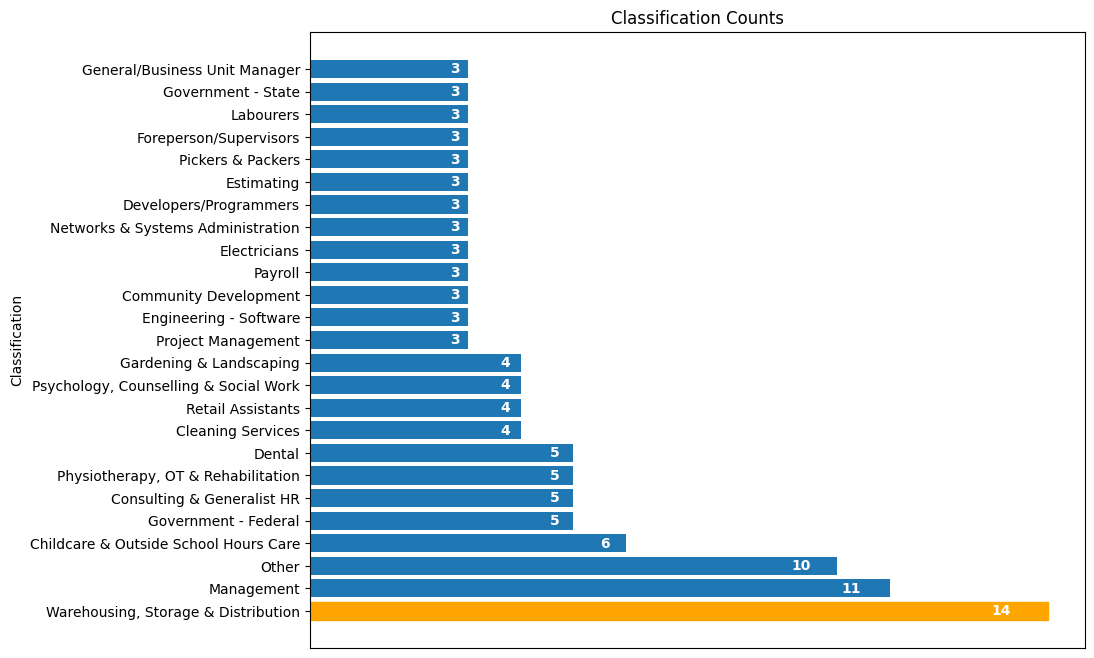

In [61]:

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the bar chart and capture the returned "bars" object
bars = plt.barh(y=class_group['Classification'], width=class_group['Count'])

# Highlight the maximum count
max_count = class_group['Count'].max()
max_classification = class_group[class_group['Count'] == max_count]['Classification'].values[0]

# Change the color of the bar with the max count to orange
for bar in bars:
    if bar.get_width() == max_count:
        bar.set_color('orange')  # Change the color of the bar with max count

# Add labels inside the bars
for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05), bar.get_y() + bar.get_height() / 2,
             str(int(bar.get_width())), va='center', ha='right', color='white', fontweight='bold')

# Hide the x-axis (count axis)
plt.gca().get_xaxis().set_visible(False)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Classification')
plt.title('Classification Counts')

# Show the plot
plt.show()


In [62]:
df[df['Classification'].str.contains('Aged & Disability Support', case = False, na = False)]

,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary
59,Operations Manager - Community Aged Services,JewishCare,Aged & Disability Support,Full time job,Bondi Junction,[],Jewishcare is a community driven not for profi...,Above Award + Not for Profit Salary Packaging
109,Community Support Worker - Sans Souci & surrou...,Meditech Staffing,Aged & Disability Support,Casual/Vacation job,Sans Souci,[],"Meditech Staffing, a Lumia Care company, prese...",$30 - $40
180,Aged Care Support Worker,KinCare Community Services,Aged & Disability Support,Part time job,Castle Hill,[Guaranteed hours and flexible rosters for wor...,Are you passionate about helping others? KinCa...,$30 - $39


In [63]:
df[df['Classification'].str.contains('Automotive Trades', case=False, na=False)]

,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary
5,Paint Prepper,Capital S.M.A.R.T. Repairs Australia Pty Ltd,Automotive Trades,Full time job,Botany,[Flexible working hours Mon-Fri | EAP service ...,We have an exciting opportunity for a Paint Pr...,Base+Super - Full Time
229,Classic Car Restoration Technician,Artefact Motor Co.,Automotive Trades,Full time job,Ultimo,[],Does working around some of the most rare and ...,"$75,000 – $90,000 per year"


In [64]:
job_type = df.groupby('Job Type').size()

In [65]:
job_type

Job Type
Casual/Vacation job     19
Contract/Temp job       36
Full time job          179
Part time job           12
dtype: int64

<Axes: >

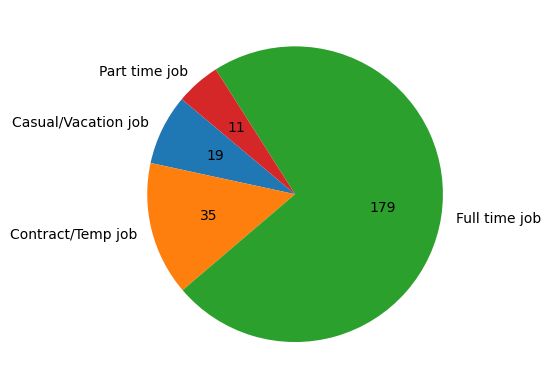

In [66]:
job_type.plot(kind='pie', labels=job_type.index, autopct=lambda p: f'{int(p * job_type.sum() / 100)}', startangle=140)


In [67]:
df_casual = df[df['Job Type'].str.contains('Casual/Vacation job',case=False, na=False)]

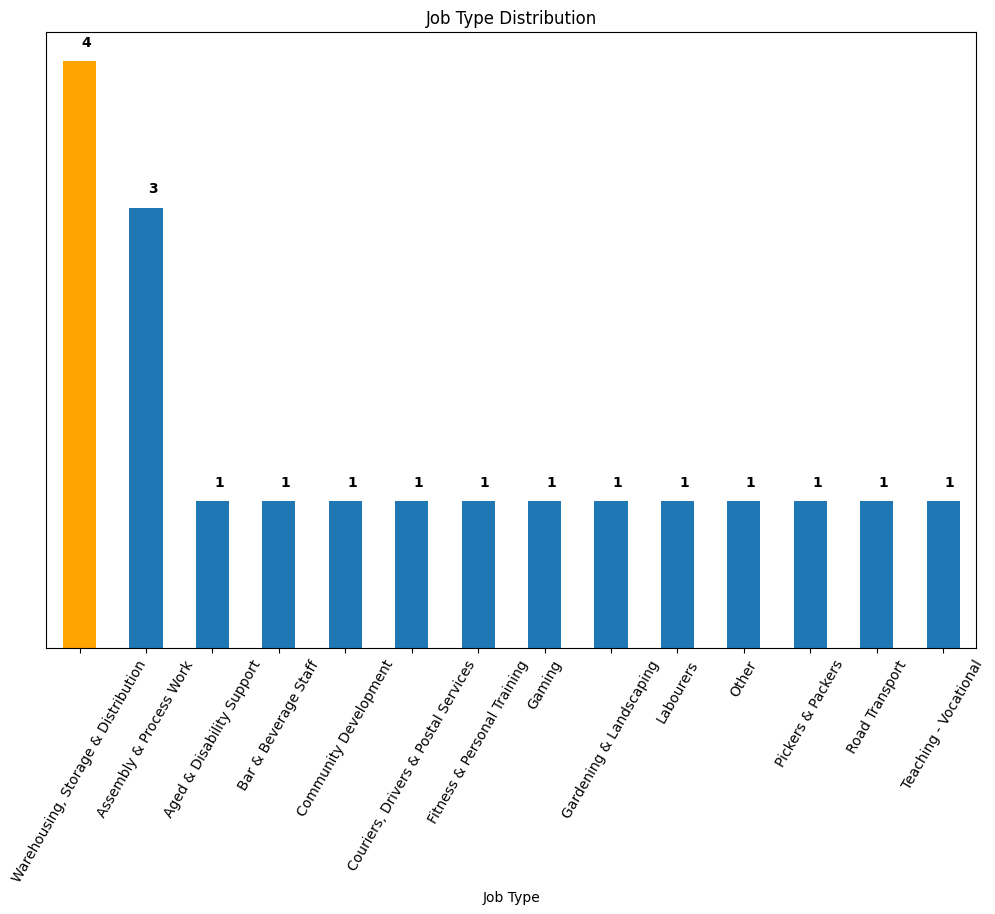

In [68]:
to_plot = df_casual.groupby('Classification').size().sort_values(ascending=False)

# Create a bar plot
ax = to_plot.plot(kind='bar', figsize=(12, 8))

# Highlight the maximum bar
max_value = to_plot.max()
max_index = to_plot.idxmax()

# Find the position (index) of the maximum value
max_pos = to_plot.argmax()

# Set the color of the maximum bar to a different color (e.g., 'orange')
ax.patches[max_pos].set_facecolor('orange')

# Add label just right of each bar
for i, value in enumerate(to_plot):
    ax.text(i + 0.1, value + 0.13, str(value), ha='center', va='center', color='black', fontweight='bold')

# Set labels for the x-axis and title
plt.xlabel('Job Type')
plt.title('Job Type Distribution')

# Remove y-axis
ax.yaxis.set_visible(False)

# Rotate the x-axis labels
plt.xticks(rotation=60)

# Show the plot
plt.show()

In [ ]:
df_casual

,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary
7,Waitstaff & Bartender needed,Lowan Capital Pty Ltd,Bar & Beverage Staff,Casual/Vacation job,Sydney NSW,[],This is a great opportunity to join the Vogue ...,$30 – $40 per hour
15,Experienced Cocktail Bartenders - Casual or Fu...,The Dry Dock,Bar & Beverage Staff,Casual/Vacation job,Balmain,"[Great Culture, Career growth, Good Tips]","The Dry Dock, a historic pub established in 18...",$32 – $42 per hour
16,Carpenter/Traditional Joiner,Trim Carpenters,Carpentry & Cabinet Making,Casual/Vacation job,Sydney NSW,[Work on Sydney's most iconic and significant ...,Passionate about old buildings & the timberwor...,$45 – $55 per hour
28,Barista / Cafe All Rounder,Ernies in Annangrove,Bar & Beverage Staff,Casual/Vacation job,Annangrove,[],Casual barista / all rounders for our takeaway...,$30 – $35 per hour
30,Care Worker,Phoenix Community Project Inc,Aged & Disability Support,Casual/Vacation job,Sydney NSW,[],"We seek kind, caring individuals who see each ...",$31.46 – $45 per hour
42,Cleaner Casual - Kemps Creek NSW,City Facilities Management,Cleaning Services,Casual/Vacation job,Kemps Creek,"[Above award rates + allowances, overtime, and...",City are seeking enthusiastic cleaning team me...,$0 - $0
67,High Voltage Electricians,Mader Group,Mining - Engineering & Maintenance,Casual/Vacation job,Sydney NSW,"[RELOCATION PACKAGE, RATES FROM $75, ROLLING R...",Looking to kick start 2025 with a bang! Let us...,$75 – $90 per hour
70,Casual Educators,Affinity Education Group,Childcare & Outside School Hours Care,Casual/Vacation job,Hornsby,[Ranked as the #1 employer in the early childh...,We’d love to welcome you to our friendly casua...,$33-$39 per hour + Above Award Wages!
75,Registered Nurse,Jobwire,Nursing - Aged Care,Casual/Vacation job,Baulkham Hills,"[Available shifts now!!, Weekly Pay, Above awa...",Are you a Registered Nurse looking for additio...,$63 – $70 per hour
78,Qualified Carpenters,KPR Solutions Pty Ltd,Building Trades,Casual/Vacation job,Sydney NSW,[],Flexible casual carpentry role with competitiv...,$45 – $68 per hour


In [70]:
import re 
# Function to extract min and max salary, then calculate the average
def extract_and_average_salary(salary_str):
    # Match salary ranges for hourly and yearly formats
    hourly_pattern = r"\$(\d+(\.\d{1,2})?) – \$(\d+(\.\d{1,2})?) per hour"
    yearly_pattern = r"\$(\d{1,3}(?:,\d{3})*) – \$(\d{1,3}(?:,\d{3})*) per year"
    
    # Check for hourly salary format
    match_hourly = re.match(hourly_pattern, salary_str)
    if match_hourly:
        min_salary = float(match_hourly.group(1))
        max_salary = float(match_hourly.group(3))
        return (min_salary + max_salary) / 2
    
    # Check for yearly salary format
    match_yearly = re.match(yearly_pattern, salary_str)
    if match_yearly:
        min_salary = float(match_yearly.group(1).replace(",", ""))
        max_salary = float(match_yearly.group(2).replace(",", ""))
        return (min_salary + max_salary) / 2
    
    # Return None if the format doesn't match
    return None

# Apply the function to extract and calculate the average salary
df['Average Salary'] = df['Salary'].apply(extract_and_average_salary)

In [ ]:
df.head()

,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary,Average Salary
0,Site Foreman,Encorp Group Pty Ltd,Foreperson/Supervisors,Full time job,Sydney NSW,[],Oversee construction projects as Site Foreman ...,"$135,000 – $155,000 per year",145000.0
1,LANDSCAPE MAINTENANCE,AREA PROPERTY SERVICES PTY LTD,Gardening & Landscaping,Casual/Vacation job,Gladesville,[],Young energetic team looking for a dynamic per...,$25 – $35 per hour,30.0
2,Marketing Assistant/ Content Creator,Ceramica Homes,Marketing Assistants/Coordinators,Part time job,Sydney NSW,[],Creative content role at leading tile provider...,$30 – $35 per hour,32.5
3,Senior Women's Health and Pelvic Health Physio...,Sydney Women's Physiotherapy,"Physiotherapy, OT & Rehabilitation",Full time job,Bella Vista,[Grow your Career in Women's Pelvic Health Phy...,Grow your women's health expertise at a leadin...,"$100,000 – $120,000 per year",110000.0
4,Tradesman Plumber,CD Shore Plumbing Pty Ltd,Plumbers,Full time job,Sydney NSW,[],Plumber,$40 – $45 per hour,42.5


In [ ]:
df = df.drop('Salary', axis=1)

In [ ]:
df.to_csv('/Users/aimeetienle/Desktop/Data Analysis/webscrapingseek.csv')

NOW I WANT TO CREATE A MODEL TO PREDICT HWO MANY JOB POSTINGS NEXT MONTH BASE ON SUBURBS

In [71]:
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go
import dash_table
from dash.dependencies import Input, Output

In [81]:

# Create a Dash app
app = dash.Dash(__name__)

# Create a plotly figure for the dashboard showing average salary by job title and type
fig = px.bar(df.dropna(subset=['Average Salary']), x='Job Title', y='Average Salary', color='Job Type', title="Average Salary by Job Title and Type")

# Adding a pie chart to show distribution of job types
job_type_dist = df['Job Type'].value_counts()
pie_fig = go.Figure(data=[go.Pie(labels=job_type_dist.index, values=job_type_dist.values, hole=0.3)])

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Job Dataset Dashboard"),
    
    # Average Salary Bar Chart
    html.Div([
        dcc.Graph(figure=fig)
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Job Type Distribution Pie Chart
    html.Div([
        dcc.Graph(figure=pie_fig)
    ], style={'width': '48%', 'display': 'inline-block', 'float': 'right'}),
    
    # Location Distribution (Bar Chart)
    html.Div([
        dcc.Graph(
            figure=px.histogram(df, x='Location', title='Job Count by Location')
        )
    ], style={'width': '100%', 'padding': '20px 0'})
])

if __name__ == '__main__':
    app.run_server(debug=True)

Open a browser and go to http://127.0.0.1:8050/ to see the dashboard in action.
